In [ ]:
# Description: This program uses an artifical recurrent neural network called Long Short Memory (LSTM)
#              to predict the closing stock price of a corporation using the past 60 day stock price.

In [2]:
# install the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
# import quandl
import math
import pandas_datareader as web
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [64]:
# Data Selection Methods used:

    # Google Colab 
      #from google.colab import files
      #uploaded = files.upload() 
    # Pandas web.DataReader
      #df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-01-08')
    # Quandl 
      #quandl df= quandl.get('WIKI/stock', authtoken='yourapikey')

In [3]:
# Data Load
from google.colab import files
uploaded = files.upload()

Saving AAPL_ML_DATA.csv to AAPL_ML_DATA.csv


In [4]:
# Data DF store (Stock Selection 1)
df = pd.read_csv('AAPL_ML_DATA.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2020,296.239990,300.600006,295.190002,300.350006,299.638886,33870100
1,1/3/2020,297.149994,300.579987,296.500000,297.429993,296.725769,36580700
2,1/6/2020,293.790008,299.959992,292.750000,299.799988,299.090149,29596800
3,1/7/2020,299.839996,300.899994,297.480011,298.390015,297.683533,27218000
4,1/8/2020,297.160004,304.440002,297.160004,303.190002,302.472137,33019800
5,1/9/2020,307.239990,310.429993,306.200012,309.630005,308.896912,42527100
6,1/10/2020,310.600006,312.670013,308.250000,310.329987,309.595215,35161200
7,1/13/2020,311.640015,317.070007,311.149994,316.959992,316.209534,30383000
8,1/14/2020,316.700012,317.570007,312.170013,312.679993,311.939667,40488600
9,1/15/2020,311.850006,315.500000,309.549988,311.339996,310.602844,30480900


In [5]:
# Get the number of trading days
df.shape

(63, 7)

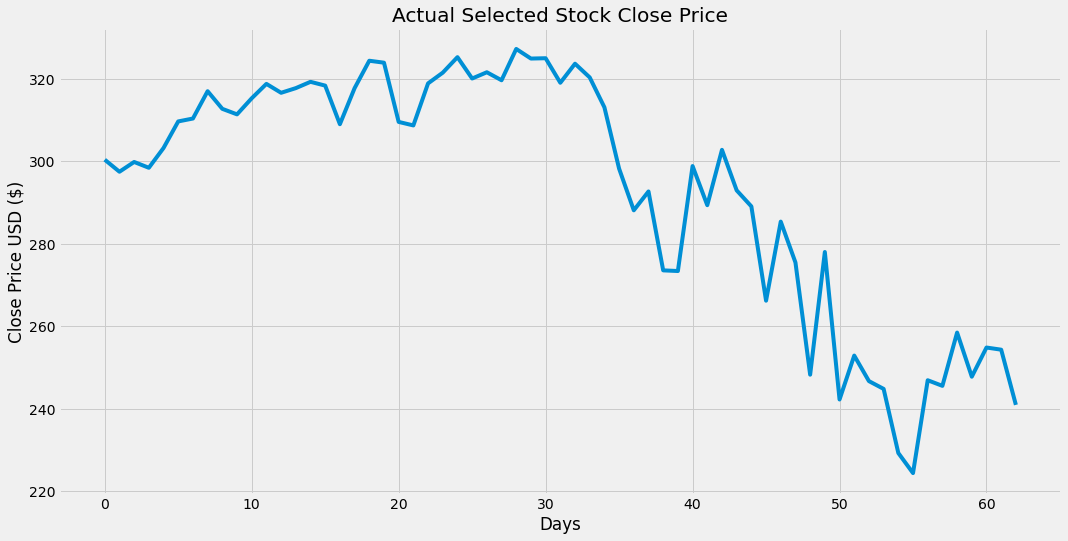

In [6]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Actual Selected Stock Close Price')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()


In [7]:
# Gather information and begin predictions!

# Get the close price
df = df[['Close']]
df.head(10)

,Close
0,300.350006
1,297.429993
2,299.799988
3,298.390015
4,303.190002
5,309.630005
6,310.329987
7,316.959992
8,312.679993
9,311.339996


In [8]:
# create a varaiable to predict the 'x' days out into the future
future_days= 20
# create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(10)

,Close,Prediction
53,244.779999,NaN
54,229.240006,NaN
55,224.369995,NaN
56,246.880005,NaN
57,245.520004,NaN
58,258.440002,NaN
59,247.740006,NaN
60,254.809998,NaN
61,254.289993,NaN
62,240.910004,NaN


In [9]:
# Create the feature data set(X) and convert it into a numpy array then remove the last 'x' roys/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X) 

[[300.3500061]
 [297.4299927]
 [299.7999878]
 [298.3900146]
 [303.1900024]
 [309.6300049]
 [310.3299866]
 [316.9599915]
 [312.6799927]
 [311.3399963]
 [315.2399902]
 [318.730011 ]
 [316.5700073]
 [317.7000122]
 [319.230011 ]
 [318.3099976]
 [308.9500122]
 [317.6900024]
 [324.3399963]
 [323.8699951]
 [309.5100098]
 [308.6600037]
 [318.8500061]
 [321.4500122]
 [325.2099915]
 [320.0299988]
 [321.5499878]
 [319.6099854]
 [327.2000122]
 [324.8699951]
 [324.9500122]
 [319.       ]
 [323.6199951]
 [320.2999878]
 [313.0499878]
 [298.1799927]
 [288.0799866]
 [292.6499939]
 [273.519989 ]
 [273.3599854]
 [298.8099976]
 [289.3200073]
 [302.7399902]]


In [19]:
#Create the target data set (y) and convert it to a numpy array and get all of the taret values except the last 'x'
y = np.array(df['Prediction'])[:-future_days]
print(y)

[309.5100098 308.6600037 318.8500061 321.4500122 325.2099915 320.0299988
 321.5499878 319.6099854 327.2000122 324.8699951 324.9500122 319.
 323.6199951 320.2999878 313.0499878 298.1799927 288.0799866 292.6499939
 273.519989  273.3599854 298.8099976 289.3200073 302.7399902 292.9200134
 289.0299988 266.1700134 285.3399963 275.4299927 248.2299957 277.9700012
 242.2100067 252.8600006 246.6699982 244.7799988 229.2400055 224.3699951
 246.8800049 245.5200043 258.4400024 247.7400055 254.8099976 254.2899933
 240.9100037]


In [20]:
# Split the data into % training and % testing (80:20)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [21]:
# Model Creation 
# Decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

# Linear regression model 
lr = LinearRegression().fit(x_train, y_train)

In [22]:
# Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days] # drop old prediction column and keep rows except previous last x rows
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[321.4500122],
       [325.2099915],
       [320.0299988],
       [321.5499878],
       [319.6099854],
       [327.2000122],
       [324.8699951],
       [324.9500122],
       [319.       ],
       [323.6199951],
       [320.2999878],
       [313.0499878],
       [298.1799927],
       [288.0799866],
       [292.6499939],
       [273.519989 ],
       [273.3599854],
       [298.8099976],
       [289.3200073],
       [302.7399902]])

In [23]:
# Predictions 

# model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
# model linear regression prediction 
lr_prediction = lr.predict(x_future)
print(lr_prediction)
# Top is the decision tree regressor and bottom is the prediction for the linear regresssion model( see below)

[292.9200134 289.0299988 266.1700134 285.3399963 275.4299927 248.2299957
 242.2100067 242.2100067 302.7399902 246.6699982 244.7799988 229.2400055
 224.3699951 246.8800049 245.5200043 246.8800049 246.8800049 254.8099976
 254.2899933 240.9100037]

[284.930965   285.33771918 284.7773481  284.94178035 284.73191109
 285.55299941 285.3009384  285.30959464 284.66592294 285.16571353
 284.80655548 284.02225123 282.41361669 281.32099907 281.81538199
 279.74590003 279.72859086 282.48177056 281.45514439 282.90691675]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


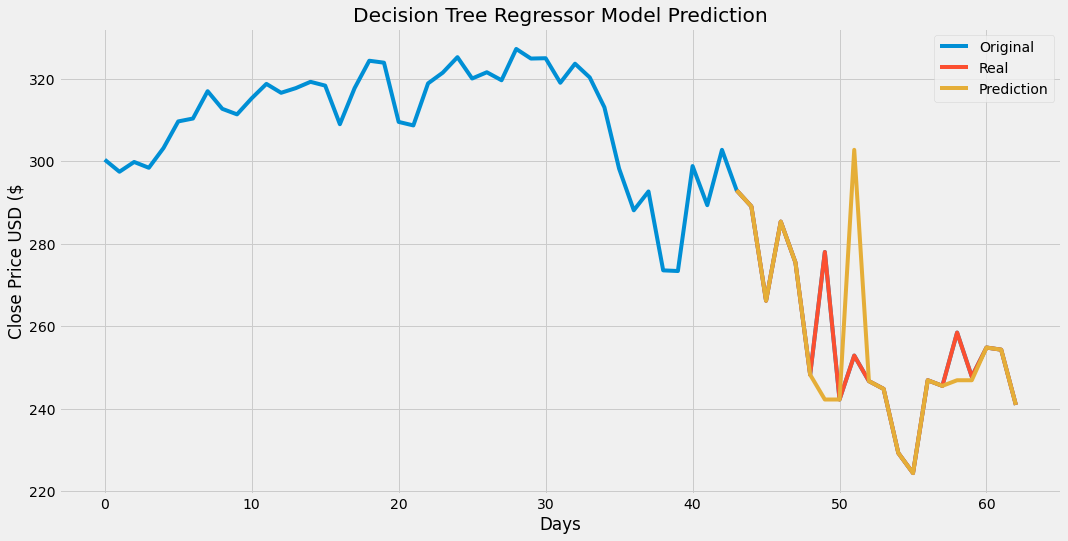

In [25]:
# Visualize Data with Predictions
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Decision Tree Regressor Model Prediction')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original','Real', 'Prediction'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


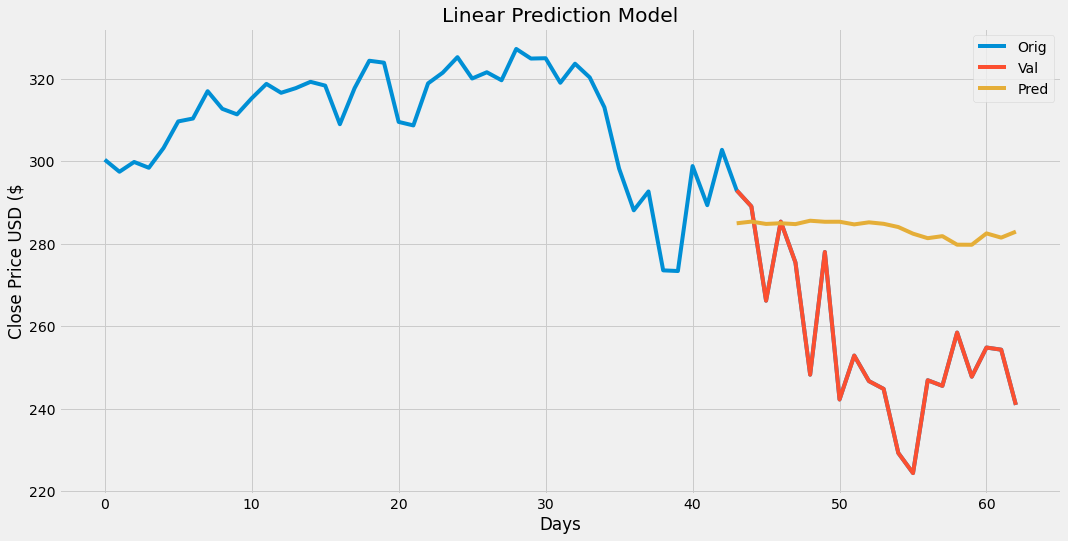

In [26]:
# Visualize the data to check the linear regression model
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Linear Prediction Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig','Val', 'Pred'])
plt.show()

In [ ]:
# Description: Create a program that used an artifical recurrent neural network called Long Short-Term Memory (LSTM)
#              to predict the closing stock price of a corporation using the past "x" day stock price.

In [ ]:
# NOTE: Change Stock ticker here! (stock selection 2)

In [27]:
# Get the stock quote
df1 = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-01-08')
#show the data
df1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.765709
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.038536
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.605175
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.144630
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.061932
...,...,...,...,...,...,...
2020-01-02,300.600006,295.190002,296.239990,300.350006,33870100.0,298.292145
2020-01-03,300.579987,296.500000,297.149994,297.429993,36580700.0,295.392120
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,297.745880


In [28]:
# get the number of rows and colors in data set shape
df1.shape

(2017, 6)

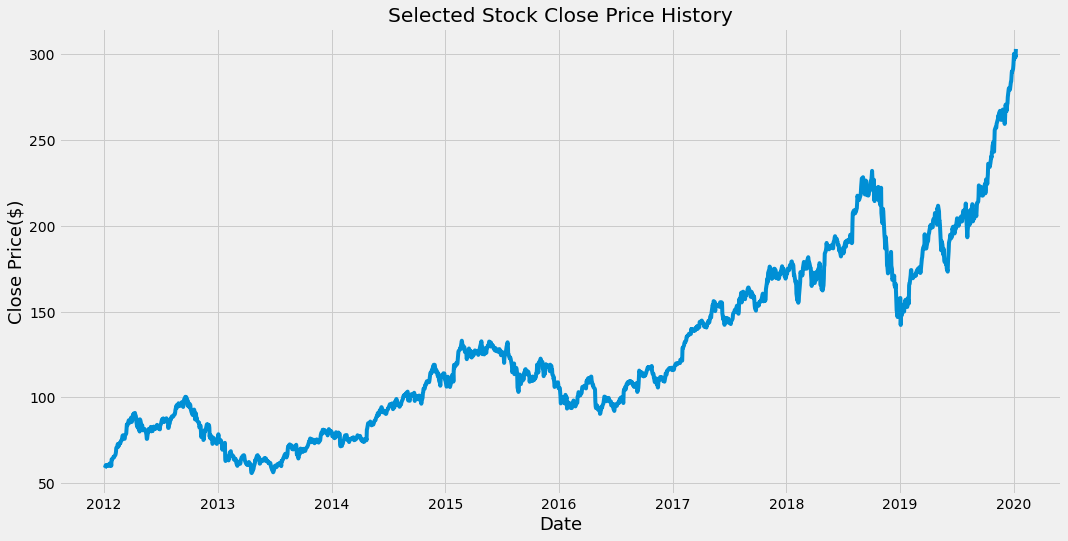

In [29]:
# Visualise the closing price history
plt.figure(figsize=(16,8))
plt.title('Selected Stock Close Price History')
plt.plot(df1['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price($)', fontsize=18)
plt.show()

In [30]:
# Create a new DF with only the close column
data = df1.filter(["Close"])
# Convert the data frame to a numpoy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8)
print(training_data_len)

1614


In [31]:
#scale the data to apply preprossing transformations to the infint data before presenting to the neuro network
scaler = MinMaxScaler(feature_range=(0,1))
# transfrom the data set computes tim min and max values per scale inclusivly to transfrom the data set
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01195288],
       [0.01322901],
       [0.01587943],
       ...,
       [0.98629743],
       [0.98059827],
       [1.        ]])

In [32]:
# Create the training data set
# Create the scaled training set 
train_data =  scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
# x_train independent training features
y_train = []
# y_train dependent training / target

#create a loop
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])# contain 60 values from 0-59
  y_train.append(train_data[i,0])# contain the 61st value at postion 60
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.01195288, 0.01322901, 0.01587943, 0.01840281, 0.01801593,
       0.01888786, 0.01848942, 0.0178196 , 0.01690727, 0.01973091,
       0.0222774 , 0.02149209, 0.01719021, 0.02129576, 0.01725372,
       0.03241136, 0.03123916, 0.03276937, 0.03607806, 0.03808175,
       0.0379143 , 0.03729645, 0.03992955, 0.04240673, 0.04521307,
       0.04974593, 0.05926781, 0.05941217, 0.06471302, 0.0686742 ,
       0.06186625, 0.06448781, 0.06443585, 0.07178659, 0.07074142,
       0.07267581, 0.07615197, 0.07808639, 0.08365862, 0.08771799,
       0.08889016, 0.08930015, 0.08235941, 0.08068482, 0.08093313,
       0.08745812, 0.08929438, 0.09323823, 0.10253493, 0.11493822,
       0.11261692, 0.11262269, 0.12159025, 0.12439657, 0.12239865,
       0.12057398, 0.11867421, 0.12498555, 0.12931632, 0.13112946])]
[0.126648565203553]



In [33]:
# Convert the x_train and y_train to numpy arrays so we can use them fro training the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)

In [34]:
# Reshape the data because the LSTM model expects info the be 3D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1554, 60, 1)

In [35]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [36]:
# compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')
# Note an optimizer is used to improve upon a loss function and a loss function is used to measure how well the model did on training

In [37]:
# Train the model *
model.fit(x_train, y_train, batch_size=1, epochs=1)

1554/1554 [==============================] - 33s 21ms/step - loss: 7.2225e-04


In [38]:
#Create the testing data set
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test and Y_test
x_test = []
y_test = dataset[training_data_len:, :] # all of the values we are trying to predict
# create x test set
for i in range(60, len(test_data)):
  #append values
  x_test.append(test_data[i-60:i, 0])
  #x_test is the pst 60 values where y_test is the actual non scaled normal values


In [39]:
# Convert the data ino a numpy array to use in the LSTM model
x_test = np.array(x_test)

In [40]:
# Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))#(number of samples'rows', number of timesteps'columns', number of features'close price')

In [41]:
# get the models predicted price values for the x_test data set
predictions = model.predict(x_test)# want to be the exact same values of the y_test set inversed
predictions = scaler.inverse_transform(predictions)# want predictions to contain the same values as y based of the x_test data set

In [43]:
# Evaluate the model
# Get the root mean squared error (RMSE) 
# Measure of how accurate the model predicts the response, and is the standard diviation of residiuals where lower values equals a better fit
rmse = np.sqrt( np.mean(predictions - y_test) **2)
rmse

2.528396303541311

In [44]:
# a vlaue of 0 for MSE means the precions where perfect. See above^ to measure potentail valididty 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


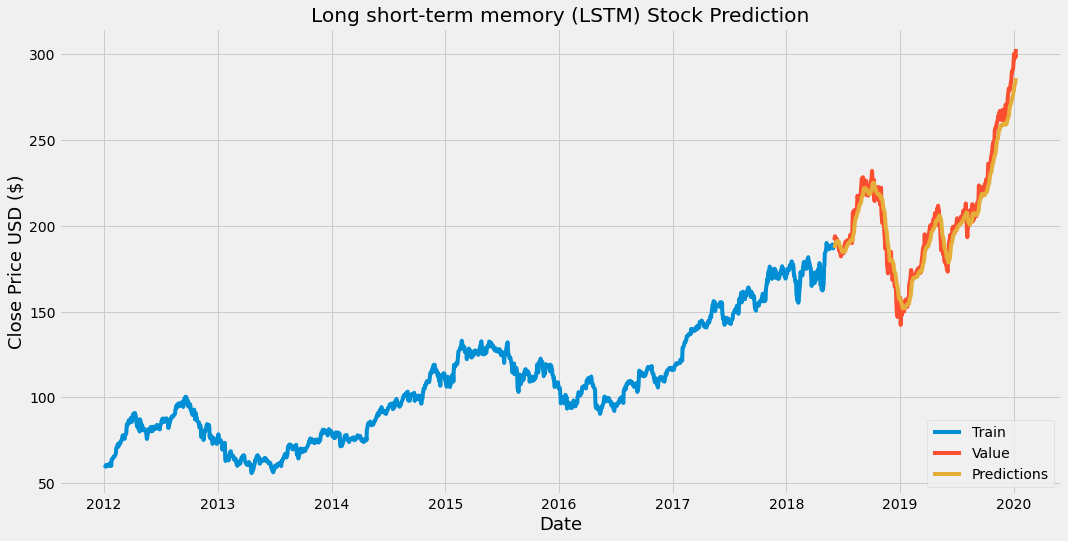

In [45]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] =  predictions
# Visualize the data
plt.figure(figsize = (16,8))
plt.title('Long short-term memory (LSTM) Stock Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])# closing price from the training data
plt.plot(valid[['Close', 'Predictions']])# actual close price and the predicted price
plt.legend(['Train','Value','Predictions'], loc='lower right')
plt.show()

In [ ]:
# Stock Prediction 'd' Days into the future!



#pt.3

In [47]:
# Data DF store (Stock Selection 3)
df2 = pd.read_csv('AAPL_ML_DATA.csv')
df2.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2020,296.239990,300.600006,295.190002,300.350006,299.638886,33870100
1,1/3/2020,297.149994,300.579987,296.500000,297.429993,296.725769,36580700
2,1/6/2020,293.790008,299.959992,292.750000,299.799988,299.090149,29596800
3,1/7/2020,299.839996,300.899994,297.480011,298.390015,297.683533,27218000
4,1/8/2020,297.160004,304.440002,297.160004,303.190002,302.472137,33019800
5,1/9/2020,307.239990,310.429993,306.200012,309.630005,308.896912,42527100
6,1/10/2020,310.600006,312.670013,308.250000,310.329987,309.595215,35161200
7,1/13/2020,311.640015,317.070007,311.149994,316.959992,316.209534,30383000
8,1/14/2020,316.700012,317.570007,312.170013,312.679993,311.939667,40488600
9,1/15/2020,311.850006,315.500000,309.549988,311.339996,310.602844,30480900


In [50]:
# get the Adjusted Close Price
df2 = df2[['Adj Close']]
print(df.head())

        Close  Prediction
0  300.350006  309.510010
1  297.429993  308.660004
2  299.799988  318.850006
3  298.390015  321.450012
4  303.190002  325.209992


In [52]:
# variable for predicting "d" days out into the future
forecast_out = 1
# Create another column (target) dependent variable, shifted in "d" units up
df2['Prediction'] = df2[['Adj Close']].shift(-1)
print(df2.tail())

     Adj Close  Prediction
58  258.440002  247.740006
59  247.740006  254.809998
60  254.809998  254.289993
61  254.289993  240.910004
62  240.910004         NaN


In [53]:
# Create the independent data set x and convert the datarame into a nump array
X2 = np.array(df2.drop(['Prediction'],1))
# remove the "d" rows
X2 = X2[:-forecast_out]
print(X2)

[[299.6388855]
 [296.725769 ]
 [299.0901489]
 [297.6835327]
 [302.4721375]
 [308.8969116]
 [309.5952148]
 [316.2095337]
 [311.9396667]
 [310.6028442]
 [314.4935913]
 [317.9753723]
 [315.8204651]
 [316.9478149]
 [318.4741821]
 [317.5563354]
 [308.2185059]
 [316.9378052]
 [323.572052 ]
 [323.1031799]
 [308.7771912]
 [307.9291992]
 [318.0950623]
 [320.6889343]
 [324.4400024]
 [320.0299988]
 [321.5499878]
 [319.6099854]
 [327.2000122]
 [324.8699951]
 [324.9500122]
 [319.       ]
 [323.6199951]
 [320.2999878]
 [313.0499878]
 [298.1799927]
 [288.0799866]
 [292.6499939]
 [273.519989 ]
 [273.3599854]
 [298.8099976]
 [289.3200073]
 [302.7399902]
 [292.9200134]
 [289.0299988]
 [266.1700134]
 [285.3399963]
 [275.4299927]
 [248.2299957]
 [277.9700012]
 [242.2100067]
 [252.8600006]
 [246.6699982]
 [244.7799988]
 [229.2400055]
 [224.3699951]
 [246.8800049]
 [245.5200043]
 [258.4400024]
 [247.7400055]
 [254.8099976]
 [254.2899933]]


In [54]:
# Create the dependent data y
# convert the dataframe to a numpy array ( all of the values includin the NANs)
y2 = np.array(df2['Prediction'])
# get all of the y values expect the last"d" rows
y2 = y2 [:-forecast_out]
print(y2)

[296.725769  299.0901489 297.6835327 302.4721375 308.8969116 309.5952148
 316.2095337 311.9396667 310.6028442 314.4935913 317.9753723 315.8204651
 316.9478149 318.4741821 317.5563354 308.2185059 316.9378052 323.572052
 323.1031799 308.7771912 307.9291992 318.0950623 320.6889343 324.4400024
 320.0299988 321.5499878 319.6099854 327.2000122 324.8699951 324.9500122
 319.        323.6199951 320.2999878 313.0499878 298.1799927 288.0799866
 292.6499939 273.519989  273.3599854 298.8099976 289.3200073 302.7399902
 292.9200134 289.0299988 266.1700134 285.3399963 275.4299927 248.2299957
 277.9700012 242.2100067 252.8600006 246.6699982 244.7799988 229.2400055
 224.3699951 246.8800049 245.5200043 258.4400024 247.7400055 254.8099976
 254.2899933 240.9100037]


In [55]:
# Split the data into training and testing data (80:20)
x2_train, x2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=.02)

In [56]:
# Create and train the Support Vector Machine (Regressor) -  a subervised learning regression problem
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x2_train, y2_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [57]:
#Testing Model: Score that returen s a coefficeient of determination R^2 of the prediction, note the best score is 1.0
svm_confidence = svr_rbf.score(x2_test, y2_test)
print('svm confidence: ', svm_confidence)

svm confidence:  0.7031388658758508


In [58]:
# Create and train the Linear Regression Model
lr = LinearRegression()
# Train the model
lr.fit(x2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
#Testing Model: Score that returen s a coefficeient of determination R^2 of the prediction, note the best score is 1.0
lr_confidence = lr.score(x2_test, y2_test)
print('lr confidence: ', lr_confidence)

lr confidence:  0.7185495673715607


In [60]:
# Set x_forecast equal to the last 30 rows of the original data fro Adj. close column
x2_forecast = np.array(df2.drop(['Prediction'],1))[-forecast_out:]
print(x2_forecast)

[[240.9100037]]


In [61]:
# Print linerar regression model predictions for "d" days
lr_prediction = lr.predict(x2_forecast)
print(lr_prediction)
print('')
# Print support vector regressor model predictions for "d" days
svm_prediction = svr_rbf.predict(x2_forecast)
print(svm_prediction)

[243.00474021]

[290.92141872]
